In [14]:
# Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split, KFold, cross_validate
from sklearn.preprocessing import label_binarize

# Helper file
import helper_data_generator

# Models
from PEA import PerformanceEnrichmentAnalysisClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Metric
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, precision_score, \
recall_score, SCORERS, roc_auc_score

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('../../data/pea_data_2018-08-28_cleaned.csv', sep=';', decimal=',')

X_full = df.loc[:, ['order_weight_aim',
                'width',
                'thickness',
                'piece_weight_aim',
                "productionsteps"]].reset_index(drop=True)
y_full = df.loc[:,'lateness']

borders = [-2880, 2880]

(y_full_encoded_values, Y_full_encoded_class_labels) =  helper_data_generator.encode_target_features_to_categorical(y_full, borders)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full_encoded_values, test_size=0.1)

In [5]:
classifier_list = [
     PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100),
     KNeighborsClassifier(3),
     SVC(kernel="linear", C=0.025),
     # SVC(gamma=2, C=1),
     DecisionTreeClassifier(max_depth=5),
     # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
     # MLPClassifier(alpha=0.01),
     AdaBoostClassifier(),
     # GaussianNB(),
     # QuadraticDiscriminantAnalysis()
]

In [259]:
clf = classifier_list[0]
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
# Sometimes 2*2 and sometimes 3*3 because of huge class imbalance in label=0
confusion_matrix(y_test, prediction)

array([[172,  41, 300],
       [  2,   0,   1],
       [ 72,  19, 172]])

In [260]:
tp_A = confusion_matrix(y_test, prediction)[0][0]
print('tp_A: ', tp_A)
tp_B = confusion_matrix(y_test, prediction)[1][1]
print('tp_B: ', tp_B)
tp_C = confusion_matrix(y_test, prediction)[2][2]
print('tp_C: ',tp_C)
tn_A = confusion_matrix(y_test, prediction)[2][2]+confusion_matrix(y_test, prediction)[2][1]+confusion_matrix(y_test, prediction)[1][1]+confusion_matrix(y_test, prediction)[1][2]
print('tn_A: ',tn_A)
tn_B = confusion_matrix(y_test, prediction)[2][2]+confusion_matrix(y_test, prediction)[0][0]+confusion_matrix(y_test, prediction)[0][2]+confusion_matrix(y_test, prediction)[2][0]
print('tn_B: ',tn_B)
tn_C = confusion_matrix(y_test, prediction)[0][0]+confusion_matrix(y_test, prediction)[0][1]+confusion_matrix(y_test, prediction)[1][1]+confusion_matrix(y_test, prediction)[1][0]
print('tn_C: ',tn_C)
fn_A = confusion_matrix(y_test, prediction)[0][1]+confusion_matrix(y_test, prediction)[0][2]
print('fn_A: ',fn_A)
fn_B = confusion_matrix(y_test, prediction)[1][0]+confusion_matrix(y_test, prediction)[1][2]
print('fn_B: ',fn_B)
fn_C = confusion_matrix(y_test, prediction)[2][0]+confusion_matrix(y_test, prediction)[2][1]
print('fn_C: ',fn_C)
fp_A = confusion_matrix(y_test, prediction)[2][0]+confusion_matrix(y_test, prediction)[1][0]
print('fp_A: ',fp_A)
fp_B = confusion_matrix(y_test, prediction)[0][1]+confusion_matrix(y_test, prediction)[2][1]
print('fp_B: ',fp_B)
fp_C = confusion_matrix(y_test, prediction)[0][2]+confusion_matrix(y_test, prediction)[1][2]
print('fp_C: ',fp_C)


sensitivity_recall_tpr_class_A = tp_A/(tp_A+fn_A)
print('sensitivity_recall_tpr_class_A: ',sensitivity_recall_tpr_class_A)
sensitivity_recall_tpr_class_B = tp_B/(tp_B+fn_B)
print('sensitivity_recall_tpr_class_B: ',sensitivity_recall_tpr_class_B)
sensitivity_recall_tpr_class_C = tp_C/(tp_C+fn_C)
print('sensitivity_recall_tpr_class_C: ',sensitivity_recall_tpr_class_C)

speificity_neg_recall_tnr_class_A = tn_A/(tn_A+fp_A)
print('speificity_neg_recall_tnr_class_A: ',speificity_neg_recall_tnr_class_A)
speificity_neg_recall_tnr_class_B = tn_B/(tn_B+fp_B)
print('speificity_neg_recall_tnr_class_B: ',speificity_neg_recall_tnr_class_B)
speificity_neg_recall_tnr_class_C = tn_C/(tn_C+fp_C)
print('speificity_neg_recall_tnr_class_C: ',speificity_neg_recall_tnr_class_C)

fpr_class_A = fp_A/(tn_A+fp_A)
print('fpr_class_A: ',fpr_class_A)
fpr_class_B = fp_B/(tn_B+fp_B)
print('fpr_class_B: ',fpr_class_B)
fpr_class_C = fp_C/(tn_C+fp_C)
print('fpr_class_C: ',fpr_class_C)

fnr_class_A = fn_A/(tp_A+fn_A)
print('fnr_class_A: ',fnr_class_A)
fnr_class_B = fn_B/(tp_B+fn_B)
print('fnr_class_B: ',fnr_class_B)
fnr_class_C = fn_C/(tp_C+fn_C)
print('fnr_class_C: ',fnr_class_C)

tp_A:  172
tp_B:  0
tp_C:  172
tn_A:  192
tn_B:  716
tn_C:  215
fn_A:  341
fn_B:  3
fn_C:  91
fp_A:  74
fp_B:  60
fp_C:  301
sensitivity_recall_tpr_class_A:  0.33528265107212474
sensitivity_recall_tpr_class_B:  0.0
sensitivity_recall_tpr_class_C:  0.6539923954372624
speificity_neg_recall_tnr_class_A:  0.7218045112781954
speificity_neg_recall_tnr_class_B:  0.9226804123711341
speificity_neg_recall_tnr_class_C:  0.4166666666666667
fpr_class_A:  0.2781954887218045
fpr_class_B:  0.07731958762886598
fpr_class_C:  0.5833333333333334
fnr_class_A:  0.6647173489278753
fnr_class_B:  1.0
fnr_class_C:  0.34600760456273766


In [262]:
mcm = multilabel_confusion_matrix(y_test, prediction, labels=[-1,0,1])
display(mcm) # Uses ovr approach
# In multilabel confusion matrix :math:`MCM`, the count of true negatives
# is :math:`MCM_{:,0,0}`, false negatives is :math:`MCM_{:,1,0}`,
# true positives is :math:`MCM_{:,1,1}` and false positives is
# :math:`MCM_{:,0,1}`.

# https://scikit-learn.org/stable/modules/model_evaluation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix

# shuffle, split and iterate and then calculate confusion matrix
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]

# Out of actual +ve samples, how many of them have been correctly predicted as +ve
sensitivity_recall_tpr = tp / (tp + fn) #sensitivity/recall/tpr/hitrate for each class
print('sensitivity_recall_tpr: ', sensitivity_recall_tpr)

# Out of actual -ve samples, how many of them have been correctly predicted as -ve
speificity_neg_recall_tnr = tn / (tn + fp) #specificity/tnr/inverse_recall for each class
print('speificity_neg_recall_tnr: ',speificity_neg_recall_tnr)

# proportion of -ve samples that were incorrectly classified
fpr = fp / (tn + fp) #fpr for each class
print('fpr: ',fpr)

# proportion of +ve samples that were incorrectly classified
fnr = fn / (tp + fn) #fnr for each class
print('fnr: ',fnr)

array([[[192,  74],
        [341, 172]],

       [[716,  60],
        [  3,   0]],

       [[215, 301],
        [ 91, 172]]])

sensitivity_recall_tpr:  [0.33528265 0.         0.6539924 ]
speificity_neg_recall_tnr:  [0.72180451 0.92268041 0.41666667]
fpr:  [0.27819549 0.07731959 0.58333333]
fnr:  [0.66471735 1.         0.3460076 ]


In [12]:
clf = classifier_list[1]
cv = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.53710046 0.46917808 0.42294521 0.47716895 0.42522831]
0.46632420091324206


In [38]:
# clf = classifier_list[1]
# cv = ShuffleSplit(n_splits=2, test_size=0.25)
# scores = cross_validate(clf, X_train, y_train, cv=cv, scoring=['accuracy','recall_macro'])
# sorted(scores.keys())
# print(scores['test_recall_macro'])
# print(scores['test_accuracy'])

[0.37172083 0.37738763]
[0.6010274  0.62214612]


In [16]:
clf = classifier_list[0]
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
y_test = label_binarize(y_test, classes=[-1,0,1])
n_classes = y_test.shape[1]
prediction = label_binarize(prediction, classes=[-1,0,1])
roc_auc_score(y_test, prediction, multi_class='ovr', average='weighted', labels=[-1,0,1])

0.5113392447702607

In [17]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
#  fpr = {0: array([0.        , 0.40740741, 1.        ]),
#  1: array([0., 1.]),
#  2: array([0.        , 0.50880626, 1.        ])}
# fpr coordinates for class 0 = (0.        , 0.40740741); (0.40740741, 1)

NameError: name 'roc_curve' is not defined

In [172]:
fpr

{0: array([0.        , 0.38811881, 1.        ]),
 1: array([0., 0., 1.]),
 2: array([0.        , 0.67527675, 1.        ])}

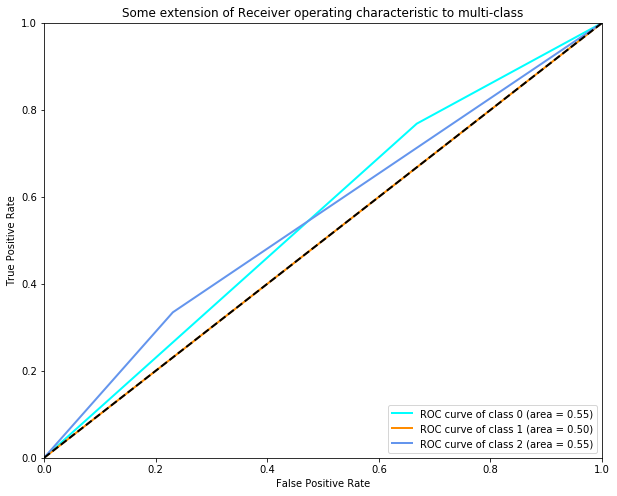

In [511]:
plt.figure(figsize=(10,8))
lw = 2
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [35]:
pd.DataFrame(y_test)['lateness'].value_counts()

-1    503
 1    274
 0      2
Name: lateness, dtype: int64

In [22]:
print((0.39562624+0+0.65693431)/3) # same approx
print(recall_score(y_test, prediction, average='macro')) #same approx

# # should not be used because we take an average and divide by 2 instead of 3 since for label 0 there can be 0 recall

0.35085351666666664
0.3508535163713582


In [78]:
df1 = pd.DataFrame(y_test)
df1['lateness'].value_counts()

-1    513
 1    266
 0      0
Name: lateness, dtype: int64

In [38]:
print((0.6557971*513+0*0+0.3960396*226)/779) # same approx
print(recall_score(y_test, prediction, average='weighted')) #same approx

0.5467636224646983
0.4865211810012837


In [338]:
print(precision_score(y_test, prediction, average='macro')) #same approx
tp_sum = tp
pred_sum = tp+fn
mask = pred_sum == 0.0
pred_sum = pred_sum.copy()
pred_sum[mask] = 1  # avoid infs/nans
result = tp_sum / pred_sum
print((0.69787986+0.+0.50234742)/3)
# https://github.com/scikit-learn/scikit-learn/blob/8611b9a9af10b46cbf68bb7fc71a44a49ed6ec1f/sklearn/metrics/_classification.py#L1183
# https://github.com/scikit-learn/scikit-learn/blob/8611b9a9af10b46cbf68bb7fc71a44a49ed6ec1f/sklearn/metrics/_classification.py#L343

0.4000757588325398
0.40007576


In [13]:
pd.DataFrame(X_train)

,order_weight_aim,width,thickness,piece_weight_aim,productionsteps
7347,128.874664,1193.800049,17.0180,26.308357,3
3749,181.436951,1549.400024,6.0960,20.865250,3
316,272.155426,1437.640015,8.5598,32.091660,3
5687,18.143696,1231.900024,1.1176,17.236509,5
3303,45.359238,1219.199951,4.4450,21.772434,3
...,...,...,...,...,...
2086,40.823311,1524.000000,0.5842,21.318842,5
2561,174.179474,1778.000000,3.2131,21.999231,3
2603,68.038857,1219.199951,4.3434,21.772434,3
3763,108.862175,1219.199951,0.4572,5.896701,5


In [504]:
# Not using  OneVsRestClassifier for PEA as of now because predict_proba not implemented in PEA
from sklearn.multiclass import OneVsRestClassifier
ovr = OneVsRestClassifier(PerformanceEnrichmentAnalysisClassifier(
        number_of_clusters=20, permutations=100))

# # Implementing PEA causes the error
# https://stackoverflow.com/questions/23866833/whats-the-full-specification-for-implementing-a-custom-scikit-learn-estimator
# https://github.com/automl/auto-sklearn/blob/74463ceb34b0e1c43f54aead53b316f0c81638ef/autosklearn/pipeline/classification.py#L102
# http://www.acme.byu.edu/wp-content/uploads/2018/02/SklearnGuide.pdf
#http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/
# https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65
#https://stellasia.github.io/blog/2020-02-02-wrapping-custom-mode-into-sklearn-estimator/
# https://gemfury.com/stream/python:scikit-learn/-/content/multiclass.py
# https://sklearn-template.readthedocs.io/en/latest/user_guide.html
y_train = pd.DataFrame(y_train)
ovr.fit(X_train, y_train)
prediction = ovr.predict(X_test)

AttributeError: 'PerformanceEnrichmentAnalysisClassifier' object has no attribute 'predict_proba'

In [9]:
mcm = multilabel_confusion_matrix(y_test, prediction, labels=[-1,0,1])
mcm

array([[[282,   0],
        [497,   0]],

       [[778,   0],
        [  1,   0]],

       [[  0, 498],
        [  0, 281]]])

In [10]:
confusion_matrix(y_test, prediction)

array([[  0,   0, 497],
       [  0,   0,   1],
       [  0,   0, 281]])

In [11]:
accuracy_score(y_test, prediction)

0.3607188703465982

In [12]:
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]

In [92]:
from sklearn.datasets import make_classification

In [7]:
def noise(clf):
    
    list_of_acc = []
    
    list_values = list(np.round(np.arange(0, 1, 0.2),2))
    
    for noise in list_values:
    
        X_train, X_test, y_train, y_test = helper_data_generator.get_make_classification_data(number_of_samples=1000,
                                    number_of_features=26,
                                    number_informative_features=5,
                                    number_redundant_features=21,
                                    number_repeated_features=0,
                                    number_classes=3,
                                    number_clusters_per_class=2,
                                    class_separator=0.9,
                                    flip_y=noise,
                                    weights=[0.6501412792191112, 0.002440277421012073, 0.3474184433598767])

        cv = ShuffleSplit(n_splits=10, test_size=0.1)
        scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
        list_of_acc.append(np.mean(scores))

    # print(np.round(list_of_acc,2))
    return np.round(list_of_acc,2)


list_lists_clf = []
list_lists_clf_accuracies = []

for i in range(len(classifier_list)):
    list_lists_clf.append('list'+str(i))

for i in range(len(list_lists_clf)):
    list_lists_clf[i] = []
    
for i in range(len(classifier_list)):
    if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
        name = 'PEA'
        list_lists_clf_accuracies.append((name,noise(classifier_list[i])))
    else:
        list_lists_clf_accuracies.append((str(classifier_list[i]).split('(')[0],noise(classifier_list[i])))

#print(list_lists_clf_accuracies)

dict_items= {}
    
for i in range(np.array(list_lists_clf_accuracies).shape[0]):
    #print(i)
    dict_items[np.unique(np.array(list_lists_clf_accuracies).T[0][i])[0]] = np.hstack((np.array(list_lists_clf_accuracies).T[1][i]))
    
# print(dict_items)

list_lists_clf = []

for i in range(5):
    list_lists_clf.append('list'+str(i))

for i in range(5):
    list_lists_clf[i] = []

for i in range(5):
    for key, value in dict_items.items():
        #print(key, value)
        list_lists_clf[i].append((key,value[i]))
    #print(len(value))
    #print(np.array(dict_items['SVC'].T).reshape(-1,1))
    
print(list_lists_clf)

list_lists_clf = np.array(list_lists_clf)
a = list_lists_clf.T[0].reshape(1,-1)
a = a[0]

_, idx = np.unique(a, return_index=True)
x = a[np.sort(idx)]

list_noise_vals = list(np.round(np.arange(0, 1, 0.2),2))
list_noise_vals = np.array(list_noise_vals)

y = list_lists_clf.T[1]

col_noise = []
for i in list_noise_vals:
    col_noise.append(('noise_'+str(i)))

[[('PEA', 0.68), ('KNeighborsClassifier', 0.93), ('SVC', 0.87), ('DecisionTreeClassifier', 0.79), ('AdaBoostClassifier', 0.81)], [('PEA', 0.54), ('KNeighborsClassifier', 0.72), ('SVC', 0.72), ('DecisionTreeClassifier', 0.72), ('AdaBoostClassifier', 0.72)], [('PEA', 0.65), ('KNeighborsClassifier', 0.55), ('SVC', 0.61), ('DecisionTreeClassifier', 0.59), ('AdaBoostClassifier', 0.55)], [('PEA', 0.48), ('KNeighborsClassifier', 0.46), ('SVC', 0.55), ('DecisionTreeClassifier', 0.55), ('AdaBoostClassifier', 0.44)], [('PEA', 0.35), ('KNeighborsClassifier', 0.38), ('SVC', 0.44), ('DecisionTreeClassifier', 0.42), ('AdaBoostClassifier', 0.34)]]


In [6]:
# df = pd.DataFrame(y, index=x, columns=col_noise, dtype='float')
# display(df)
# ax = plt.figure(figsize=(10,6))
# df.plot(kind='bar', figsize=(10,6))

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.68,0.93,0.87,0.79,0.81
noise_0.2,0.54,0.72,0.72,0.72,0.72
noise_0.4,0.65,0.55,0.61,0.59,0.55
noise_0.6,0.48,0.46,0.55,0.55,0.44
noise_0.8,0.35,0.38,0.44,0.42,0.34


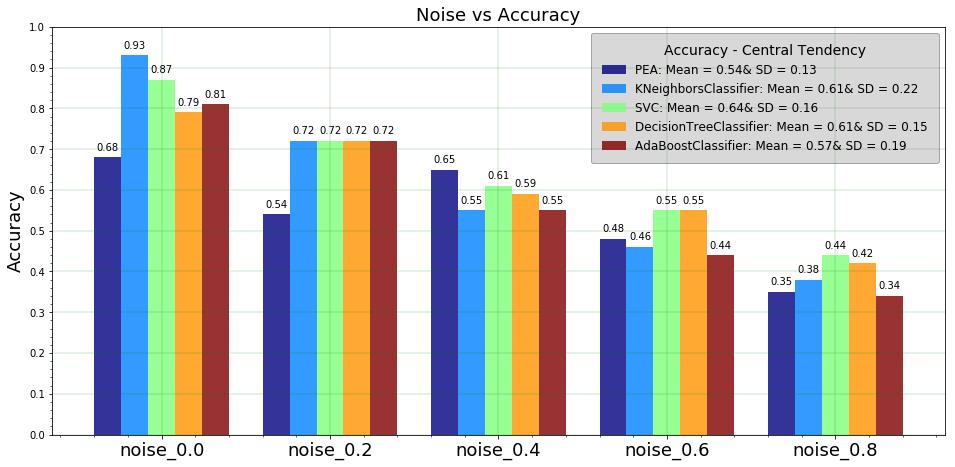

In [10]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# https://blog.finxter.com/matplotlib-legend/

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
ax.set_ylabel('Accuracy',fontsize=18)
ax.set_title('Noise vs Accuracy',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Accuracy - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

In [319]:
def noise(clf):
    
    list_of_auc = []
    list_values = list(np.round(np.arange(0, 1, 0.2),2))
    
    for noise in list_values:
        X_train, X_test, y_train, y_test = helper_data_generator.get_make_classification_data(number_of_samples=1000,
                                    number_of_features=26,
                                    number_informative_features=5,
                                    number_redundant_features=21,
                                    number_repeated_features=0,
                                    number_classes=3,
                                    number_clusters_per_class=2,
                                    class_separator=0.9,
                                    flip_y=noise,
                                    weights=[0.65, 0.11, 0.24])
        
        cv = ShuffleSplit(n_splits=10, test_size=0.1)
        # roc_auc_ovr
        # roc_auc_ovo
        # roc_auc_ovr_weighted
        # roc_auc_ovo_weighted
        # recall_weighted
        
        scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring='recall_weighted')
        list_of_auc.append(np.mean(scores))

        
#         clf.fit(X_train, y_train)
#         prediction = clf.predict(X_test)
#         y_test = label_binarize(y_test, classes=[0,1,2])
#         prediction = label_binarize(prediction, classes=[0,1,2])
#         list_of_auc.append(roc_auc_score(y_test, prediction, multi_class='ovr', average='weighted', labels=[0,1,2]))
        
        # print(np.round(list_of_acc,2))
    return np.round(list_of_auc,2)



list_lists_clf = []
list_lists_clf_accuracies = []

for i in range(len(classifier_list)):
    list_lists_clf.append('list'+str(i))

for i in range(len(list_lists_clf)):
    list_lists_clf[i] = []
    
for i in range(len(classifier_list)):
    if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
        name = 'PEA'
        list_lists_clf_accuracies.append((name,noise(classifier_list[i])))
    else:
        list_lists_clf_accuracies.append((str(classifier_list[i]).split('(')[0],noise(classifier_list[i])))

#print(list_lists_clf_accuracies)

dict_items= {}
    
for i in range(np.array(list_lists_clf_accuracies).shape[0]):
    #print(i)
    dict_items[np.unique(np.array(list_lists_clf_accuracies).T[0][i])[0]] = np.hstack((np.array(list_lists_clf_accuracies).T[1][i]))
    
print(dict_items)

list_lists_clf = []

for i in range(5):
    list_lists_clf.append('list'+str(i))

for i in range(5):
    list_lists_clf[i] = []

for i in range(5):
    for key, value in dict_items.items():
        #print(key, value)
        list_lists_clf[i].append((key,value[i]))
    #print(len(value))
    #print(np.array(dict_items['SVC'].T).reshape(-1,1))
    
#print(list_lists_clf)

list_lists_clf = np.array(list_lists_clf)
a = list_lists_clf.T[0].reshape(1,-1)
a = a[0]

_, idx = np.unique(a, return_index=True)
x = a[np.sort(idx)]

list_noise_vals = list(np.round(np.arange(0, 1, 0.2),2))
list_noise_vals = np.array(list_noise_vals)

y = list_lists_clf.T[1]

col_noise = []
for i in list_noise_vals:
    col_noise.append(('noise_'+str(i)))

{'PEA': array([0.74, 0.57, 0.59, 0.44, 0.4 ]), 'KNeighborsClassifier': array([0.82, 0.72, 0.62, 0.52, 0.4 ]), 'SVC': array([0.84, 0.78, 0.59, 0.51, 0.4 ]), 'DecisionTreeClassifier': array([0.87, 0.7 , 0.59, 0.5 , 0.37]), 'AdaBoostClassifier': array([0.8 , 0.67, 0.64, 0.46, 0.39])}


In [412]:
# def normalize(probs):
#     prob_factor = 1 / sum(probs)
#     return [prob_factor * p for p in probs]

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.70,0.94,0.88,0.75,0.83
noise_0.2,0.65,0.78,0.80,0.69,0.75
noise_0.4,0.60,0.66,0.66,0.62,0.65
noise_0.6,0.55,0.57,0.59,0.55,0.60
noise_0.8,0.51,0.52,0.52,0.53,0.54


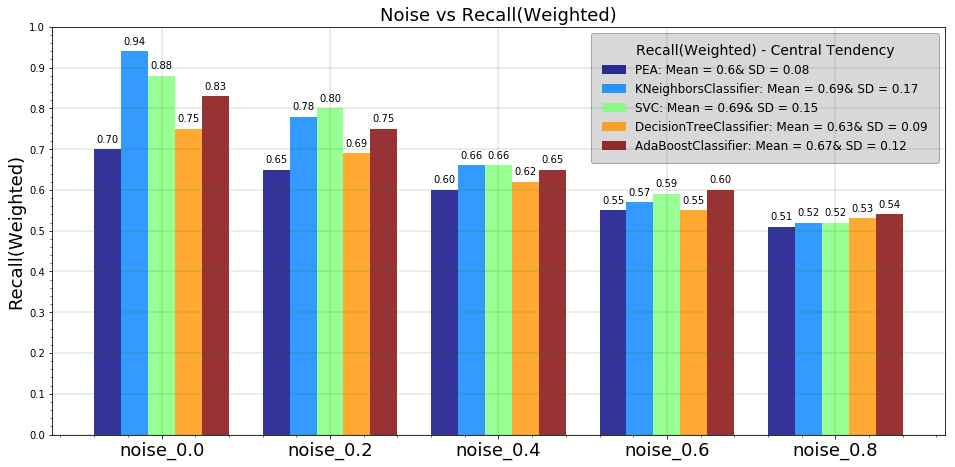

In [41]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# https://blog.finxter.com/matplotlib-legend/

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
ax.set_ylabel('Recall(Weighted)',fontsize=18)
ax.set_title('Noise vs Recall(Weighted)',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Recall(Weighted) - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

In [42]:
display(df_1)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.70,0.94,0.88,0.75,0.83
noise_0.2,0.65,0.78,0.80,0.69,0.75
noise_0.4,0.60,0.66,0.66,0.62,0.65
noise_0.6,0.55,0.57,0.59,0.55,0.60
noise_0.8,0.51,0.52,0.52,0.53,0.54


In [43]:
df_1.describe()

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.602000,0.694000,0.690000,0.628000,0.674000
std,0.075961,0.169352,0.148324,0.092844,0.116319
min,0.510000,0.520000,0.520000,0.530000,0.540000
25%,0.550000,0.570000,0.590000,0.550000,0.600000
50%,0.600000,0.660000,0.660000,0.620000,0.650000
75%,0.650000,0.780000,0.800000,0.690000,0.750000
max,0.700000,0.940000,0.880000,0.750000,0.830000


In [128]:
# 'PerformanceEnrichmentAnalysisClassifier' object has no attribute 'predict_proba' while using cross_val_score for
# roc_auc_ovr_weighted

from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.utils import shuffle

list_of_auc = []

X, y = helper_data_generator.make_classification(n_samples=1000,
                               n_features=26,
                               n_informative=21,
                               n_redundant=5,
                               n_repeated=0,
                               n_classes=3,
                               n_clusters_per_class=1,
                               class_sep=0.9,
                               flip_y=0.9,
                               weights=[0.65,0.11,0.24])

column_size = X.shape[1]
cols = [x + str(i) for x, i in zip(["col"]*column_size,
                                       range(column_size))]

y = pd.DataFrame(y, columns=['label'])
y.index = np.arange(0, len(y))
y.index.name = 'index'

syn_df = pd.DataFrame(X, columns=cols)
syn_df.index = np.arange(0, len(syn_df))
syn_df.index.name = 'index'
syn_df = syn_df.merge(y, on='index')
#display(syn_df)

    
rkf = KFold(n_splits=10)
for train, test in rkf.split(syn_df):
    syn_df_train = syn_df.loc[train]
    syn_df_test = syn_df.loc[test]
    X_train = syn_df_train.loc[:, cols].reset_index(drop=True)
    y_train = syn_df_train.loc[:, 'label'].reset_index(drop=True)
    X_test = syn_df_test.loc[:, cols].reset_index(drop=True)
    y_test = syn_df_test.loc[:, 'label'].reset_index(drop=True)
    X_train, y_train = shuffle(X_train, y_train)
    classifier_list[0].fit(X_train, y_train)
    prediction = classifier_list[0].predict(X_test)
    y_test = label_binarize(y_test, classes=[0,1,2])
    prediction = label_binarize(prediction, classes=[0,1,2])
    list_of_auc.append(roc_auc_score(y_test, prediction, multi_class='ovr', average='weighted', labels=[0,1,2]))
    

In [129]:
np.mean(list_of_auc)

0.47423837685251835

In [318]:
# 'PerformanceEnrichmentAnalysisClassifier' object has no attribute 'predict_proba' while using cross_val_score for
# roc_auc_ovr_weighted

from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.utils import shuffle

def noise(clf):
    
    list_of_auc = []
    list_values = list(np.round(np.arange(0, 1, 0.2),2))
    
    for noise in list_values:
        list_temp = []
        X, y = helper_data_generator.make_classification(n_samples=5000,
                                       n_features=26,
                                       n_informative=21,
                                       n_redundant=5,
                                       n_repeated=0,
                                       n_classes=3,
                                       n_clusters_per_class=1,
                                       class_sep=0.9,
                                       flip_y=noise,
                                       weights=[0.65,0.11,0.24])

        column_size = X.shape[1]
        cols = [x + str(i) for x, i in zip(["col"]*column_size,
                                               range(column_size))]

        y = pd.DataFrame(y, columns=['label'])
        y.index = np.arange(0, len(y))
        y.index.name = 'index'

        syn_df = pd.DataFrame(X, columns=cols)
        syn_df.index = np.arange(0, len(syn_df))
        syn_df.index.name = 'index'
        syn_df = syn_df.merge(y, on='index')
        #display(syn_df)


        rkf = KFold(n_splits=10)
        for train, test in rkf.split(syn_df):
            syn_df_train = syn_df.loc[train]
            syn_df_test = syn_df.loc[test]
            X_train = syn_df_train.loc[:, cols].reset_index(drop=True)
            y_train = syn_df_train.loc[:, 'label'].reset_index(drop=True)
            X_test = syn_df_test.loc[:, cols].reset_index(drop=True)
            y_test = syn_df_test.loc[:, 'label'].reset_index(drop=True)
            X_train, y_train = shuffle(X_train, y_train)
            clf.fit(X_train, y_train)
            prediction = clf.predict(X_test)
            y_test = label_binarize(y_test, classes=[0,1,2])
            prediction = label_binarize(prediction, classes=[0,1,2])
            list_temp.append(roc_auc_score(y_test, prediction, multi_class='ovr', average='weighted', labels=[0,1,2]))
        
        
        list_of_auc.append(np.mean(list_temp))
    #print(np.round(list_of_auc,2))
    return np.round(list_of_auc,2)



list_lists_clf = []
list_lists_clf_accuracies = []

for i in range(len(classifier_list)):
    list_lists_clf.append('list'+str(i))

for i in range(len(list_lists_clf)):
    list_lists_clf[i] = []
    
for i in range(len(classifier_list)):
    if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
        name = 'PEA'
        list_lists_clf_accuracies.append((name,noise(classifier_list[i])))
    else:
        list_lists_clf_accuracies.append((str(classifier_list[i]).split('(')[0],noise(classifier_list[i])))

#print(list_lists_clf_accuracies)

dict_items= {}
    
for i in range(np.array(list_lists_clf_accuracies).shape[0]):
    #print(i)
    dict_items[np.unique(np.array(list_lists_clf_accuracies).T[0][i])[0]] = np.hstack((np.array(list_lists_clf_accuracies).T[1][i]))
    
print(dict_items)

list_lists_clf = []

for i in range(5):
    list_lists_clf.append('list'+str(i))

for i in range(5):
    list_lists_clf[i] = []

for i in range(5):
    for key, value in dict_items.items():
        #print(key, value)
        list_lists_clf[i].append((key,value[i]))
    #print(len(value))
    #print(np.array(dict_items['SVC'].T).reshape(-1,1))
    
#print(list_lists_clf)

list_lists_clf = np.array(list_lists_clf)
a = list_lists_clf.T[0].reshape(1,-1)
a = a[0]

_, idx = np.unique(a, return_index=True)
x = a[np.sort(idx)]

list_noise_vals = list(np.round(np.arange(0, 1, 0.2),2))
list_noise_vals = np.array(list_noise_vals)

y = list_lists_clf.T[1]

col_noise = []
for i in list_noise_vals:
    col_noise.append(('noise_'+str(i)))

KeyboardInterrupt: 

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.70,0.94,0.88,0.75,0.83
noise_0.2,0.65,0.78,0.80,0.69,0.75
noise_0.4,0.60,0.66,0.66,0.62,0.65
noise_0.6,0.55,0.57,0.59,0.55,0.60
noise_0.8,0.51,0.52,0.52,0.53,0.54


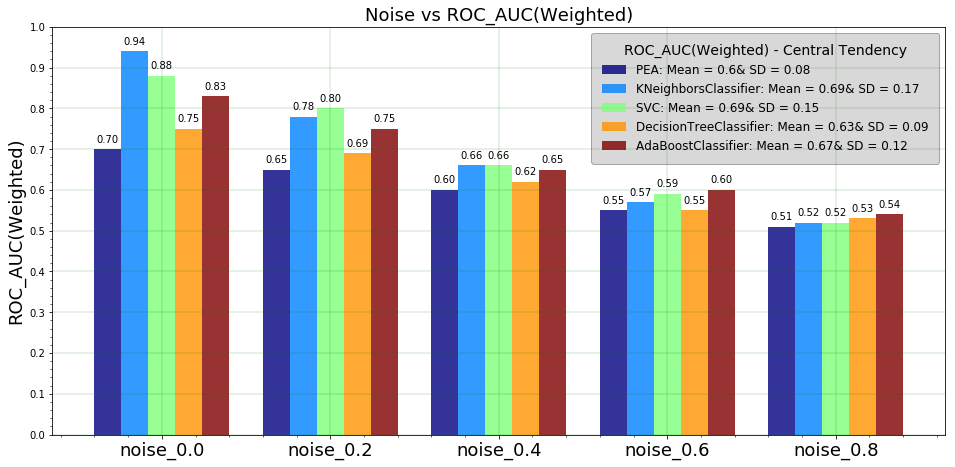

In [6]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# https://blog.finxter.com/matplotlib-legend/

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
ax.set_ylabel('ROC_AUC(Weighted)',fontsize=18)
ax.set_title('Noise vs ROC_AUC(Weighted)',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='ROC_AUC(Weighted) - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

In [378]:
# 'PerformanceEnrichmentAnalysisClassifier' object has no attribute 'predict_proba' while using cross_val_score for
# roc_auc_ovr_weighted

from sklearn.model_selection import RepeatedKFold, KFold
from sklearn.utils import shuffle

def noise(clf):
    
    list_of_class_sensitivity = []
    list_values = list(np.round(np.arange(0, 1, 0.2),2))
    
    for noise in list_values:
        list_temp_A = []
        list_temp_B = []
        list_temp_C = []
        X, y = helper_data_generator.make_classification(n_samples=5000,
                                       n_features=26,
                                       n_informative=21,
                                       n_redundant=5,
                                       n_repeated=0,
                                       n_classes=3,
                                       n_clusters_per_class=1,
                                       class_sep=0.9,
                                       flip_y=noise,
                                       weights=[0.65,0.11,0.24])

        column_size = X.shape[1]
        cols = [x + str(i) for x, i in zip(["col"]*column_size,
                                               range(column_size))]

        y = pd.DataFrame(y, columns=['label'])
        y.index = np.arange(0, len(y))
        y.index.name = 'index'

        syn_df = pd.DataFrame(X, columns=cols)
        syn_df.index = np.arange(0, len(syn_df))
        syn_df.index.name = 'index'
        syn_df = syn_df.merge(y, on='index')
        #display(syn_df)


        rkf = KFold(n_splits=2)
        for train, test in rkf.split(syn_df):
            syn_df_train = syn_df.loc[train]
            syn_df_test = syn_df.loc[test]
            X_train = syn_df_train.loc[:, cols].reset_index(drop=True)
            y_train = syn_df_train.loc[:, 'label'].reset_index(drop=True)
            X_test = syn_df_test.loc[:, cols].reset_index(drop=True)
            y_test = syn_df_test.loc[:, 'label'].reset_index(drop=True)
            X_train, y_train = shuffle(X_train, y_train)
            clf.fit(X_train, y_train)
            prediction = clf.predict(X_test)
            mcm = multilabel_confusion_matrix(y_test, prediction, labels=[0,1,2])
            tn = mcm[:, 0, 0]
            tp = mcm[:, 1, 1]
            fn = mcm[:, 1, 0]
            fp = mcm[:, 0, 1]
            fnr_class_A = (fn / (fn + tp))[0]
            fnr_class_B = (fn / (fn + tp))[1]
            fnr_class_C = (fn / (fn + tp))[2]
            list_temp_A.append(fnr_class_A)
            list_temp_B.append(fnr_class_B)
            list_temp_C.append(fnr_class_C)
        
#         print(np.round(np.mean(list_temp_A),2))
#         print(np.round(np.mean(list_temp_B),2))
#         print(np.round(np.mean(list_temp_C),2))
        list_of_class_sensitivity.append((np.mean(list_temp_A),np.mean(list_temp_B),np.mean(list_temp_C)))
    #print(np.round(list_of_auc,2))
    return list(np.round(list_of_class_sensitivity,2)[:,2]) # class A or -1

In [324]:
noise(classifier_list[0])

[0.63, 0.77, 0.75, 0.44, 0.38]

In [300]:
abc

array([[0.64, 0.52, 0.53],
       [0.68, 0.21, 0.48]])

In [287]:
abc[:,1]

array([0.35, 0.36, 0.2 , 0.21, 0.29])

In [379]:
list_lists_clf = []
list_lists_clf_accuracies = []

for i in range(len(classifier_list)):
    list_lists_clf.append('list'+str(i))

for i in range(len(list_lists_clf)):
    list_lists_clf[i] = []
    
for i in range(len(classifier_list)):
    if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
        name = 'PEA'
        list_lists_clf_accuracies.append((name,noise(classifier_list[i])))
    else:
        list_lists_clf_accuracies.append((str(classifier_list[i]).split('(')[0],noise(classifier_list[i])))

#print(list_lists_clf_accuracies)

dict_items= {}
    
for i in range(np.array(list_lists_clf_accuracies).shape[0]):
    #print(i)
    dict_items[np.unique(np.array(list_lists_clf_accuracies).T[0][i])[0]] = np.hstack((np.array(list_lists_clf_accuracies).T[1][i]))
    
print(dict_items)

list_lists_clf = []

for i in range(5):
    list_lists_clf.append('list'+str(i))

for i in range(5):
    list_lists_clf[i] = []

for i in range(5):
    for key, value in dict_items.items():
        #print(key, value)
        list_lists_clf[i].append((key,value[i]))
    #print(len(value))
    #print(np.array(dict_items['SVC'].T).reshape(-1,1))
    
#print(list_lists_clf)

list_lists_clf = np.array(list_lists_clf)
a = list_lists_clf.T[0].reshape(1,-1)
a = a[0]

_, idx = np.unique(a, return_index=True)
x = a[np.sort(idx)]

list_noise_vals = list(np.round(np.arange(0, 1, 0.2),2))
list_noise_vals = np.array(list_noise_vals)

y = list_lists_clf.T[1]

col_noise = []
for i in list_noise_vals:
    col_noise.append(('noise_'+str(i)))

{'PEA': array([0.51, 0.44, 0.58, 0.64, 0.73]), 'KNeighborsClassifier': array([0.18, 0.4 , 0.51, 0.68, 0.75]), 'SVC': array([0.09, 0.43, 0.5 , 0.65, 0.66]), 'DecisionTreeClassifier': array([0.41, 0.48, 0.6 , 0.64, 0.61]), 'AdaBoostClassifier': array([0.28, 0.34, 0.48, 0.63, 0.66])}


,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.74,0.99,0.98,0.95,0.92
noise_0.2,0.64,0.94,0.95,0.90,0.90
noise_0.4,0.65,0.83,0.95,0.88,0.83
noise_0.6,0.50,0.71,0.87,0.72,0.74
noise_0.8,0.43,0.59,0.84,0.55,0.64


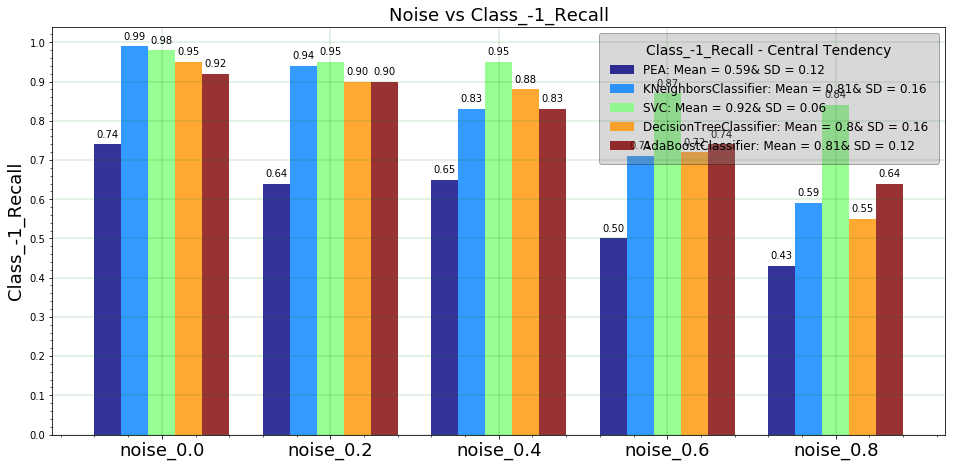

In [339]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
ax.set_ylabel('Class_-1_Recall',fontsize=18)
ax.set_title('Noise vs Class_-1_Recall',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_-1_Recall - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.49,0.66,0.75,0.20,0.55
noise_0.2,0.22,0.38,0.38,0.19,0.32
noise_0.4,0.21,0.25,0.16,0.16,0.22
noise_0.6,0.21,0.21,0.13,0.12,0.16
noise_0.8,0.22,0.22,0.02,0.18,0.17


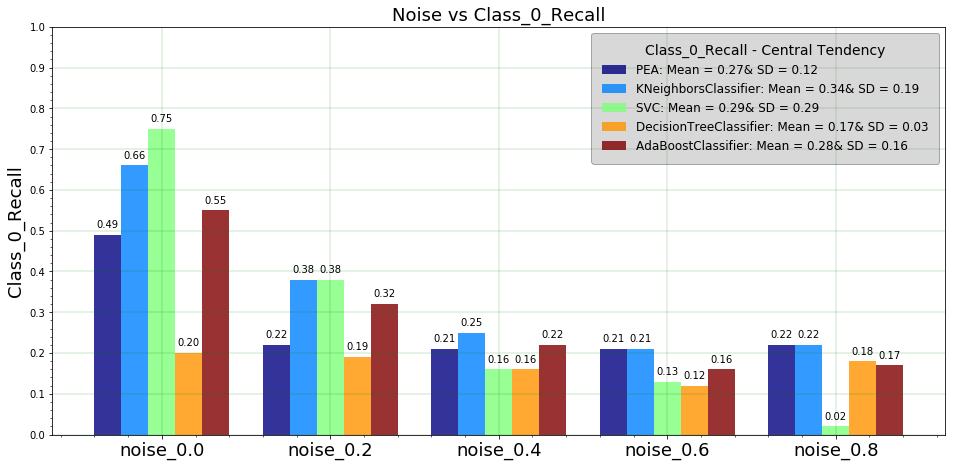

In [349]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
ax.set_ylabel('Class_0_Recall',fontsize=18)
ax.set_title('Noise vs Class_0_Recall',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_0_Recall - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.66,0.87,0.79,0.59,0.63
noise_0.2,0.69,0.56,0.68,0.47,0.55
noise_0.4,0.35,0.42,0.43,0.44,0.43
noise_0.6,0.42,0.33,0.39,0.36,0.34
noise_0.8,0.32,0.25,0.29,0.27,0.31


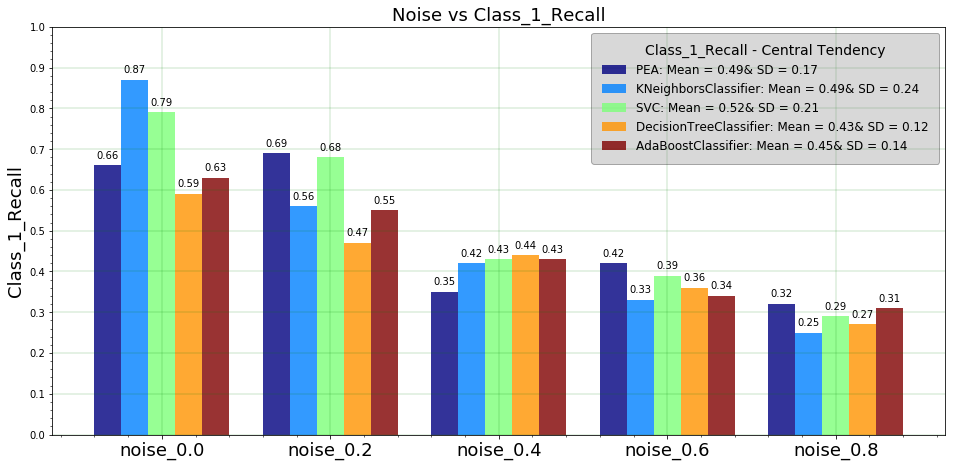

In [346]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
ax.set_ylabel('Class_1_Recall',fontsize=18)
ax.set_title('Noise vs Class_1_Recall',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_1_Recall - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.80,0.87,0.85,0.64,0.74
noise_0.2,0.72,0.62,0.69,0.56,0.61
noise_0.4,0.71,0.48,0.51,0.39,0.51
noise_0.6,0.66,0.43,0.27,0.39,0.44
noise_0.8,0.65,0.45,0.25,0.28,0.46


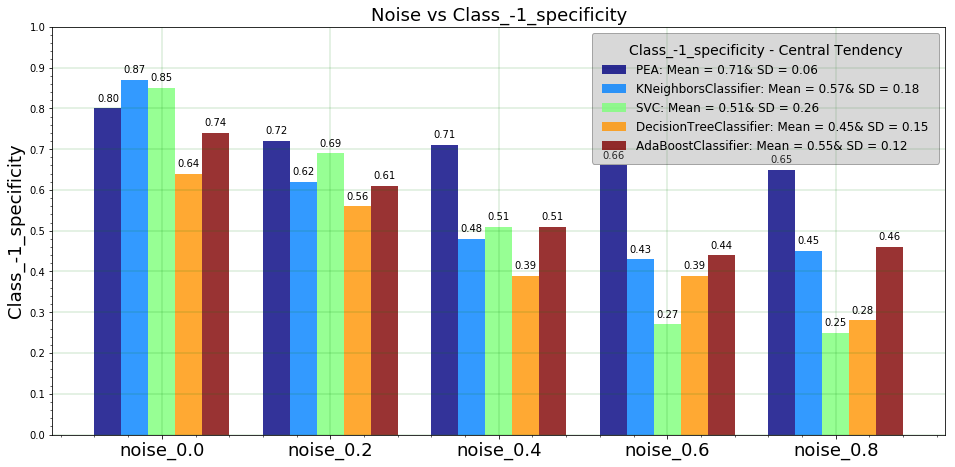

In [352]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
ax.set_ylabel('Class_-1_specificity',fontsize=18)
ax.set_title('Noise vs Class_-1_specificity',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_-1_specificity - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.83,0.99,0.99,0.98,0.96
noise_0.2,0.93,0.97,0.99,0.95,0.95
noise_0.4,0.80,0.92,0.98,0.96,0.94
noise_0.6,0.86,0.88,0.98,0.92,0.91
noise_0.8,0.70,0.80,0.99,0.72,0.84


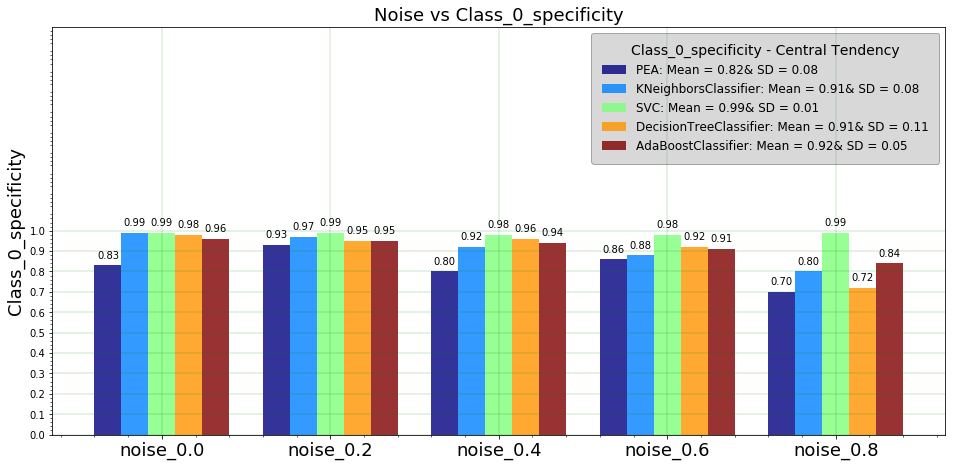

In [356]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
ax.set_ylim(0,2)
ax.set_ylabel('Class_0_specificity',fontsize=18)
ax.set_title('Noise vs Class_0_specificity',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_0_specificity - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.85,0.98,0.98,0.92,0.98
noise_0.2,0.81,0.94,0.94,0.92,0.89
noise_0.4,0.86,0.89,0.90,0.86,0.83
noise_0.6,0.72,0.84,0.90,0.81,0.79
noise_0.8,0.68,0.77,0.89,0.76,0.76


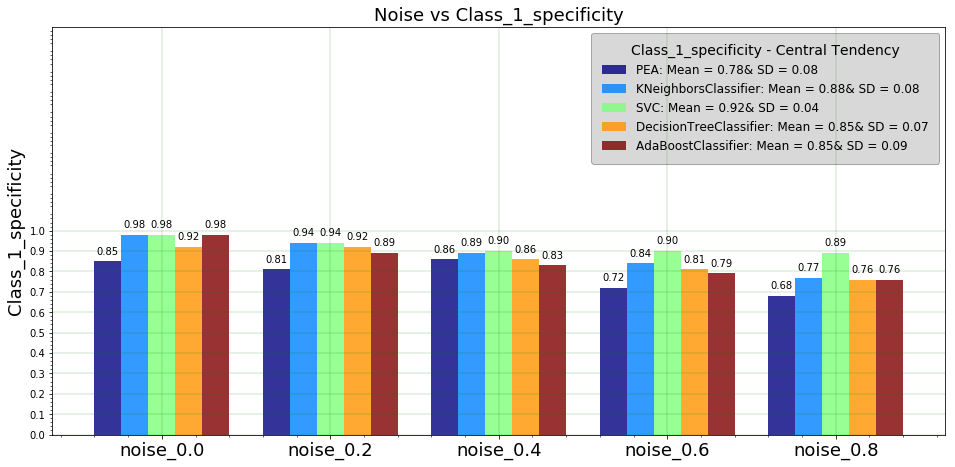

In [359]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
ax.set_ylim(0,2)
ax.set_ylabel('Class_1_specificity',fontsize=18)
ax.set_title('Noise vs Class_1_specificity',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_1_specificity - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.35,0.19,0.19,0.32,0.26
noise_0.2,0.29,0.42,0.38,0.43,0.35
noise_0.4,0.43,0.50,0.54,0.52,0.47
noise_0.6,0.45,0.59,0.61,0.59,0.58
noise_0.8,0.30,0.53,0.76,0.59,0.56


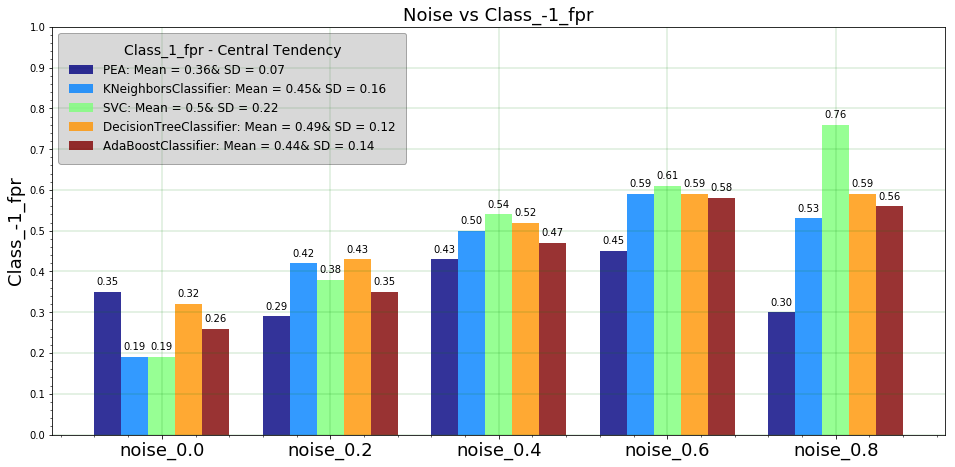

In [363]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
#ax.set_ylim(0,2)
ax.set_ylabel('Class_-1_fpr',fontsize=18)
ax.set_title('Noise vs Class_-1_fpr',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_1_fpr - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.11,0.01,0.01,0.03,0.04
noise_0.2,0.25,0.03,0.01,0.02,0.05
noise_0.4,0.28,0.08,0.02,0.06,0.06
noise_0.6,0.18,0.13,0.01,0.06,0.10
noise_0.8,0.32,0.19,0.01,0.09,0.14


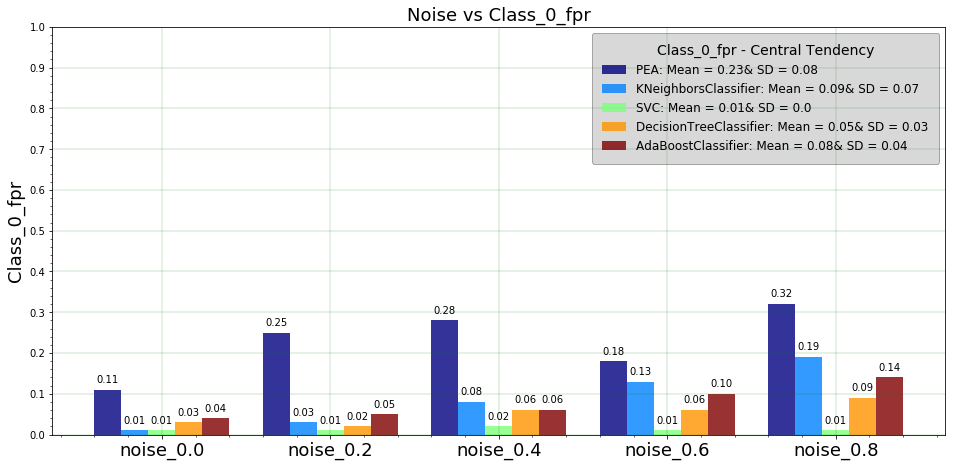

In [366]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
#ax.set_ylim(0,2)
ax.set_ylabel('Class_0_fpr',fontsize=18)
ax.set_title('Noise vs Class_0_fpr',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_0_fpr - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.29,0.02,0.02,0.10,0.07
noise_0.2,0.18,0.06,0.07,0.10,0.10
noise_0.4,0.25,0.11,0.11,0.19,0.14
noise_0.6,0.25,0.19,0.13,0.15,0.18
noise_0.8,0.33,0.21,0.14,0.17,0.21


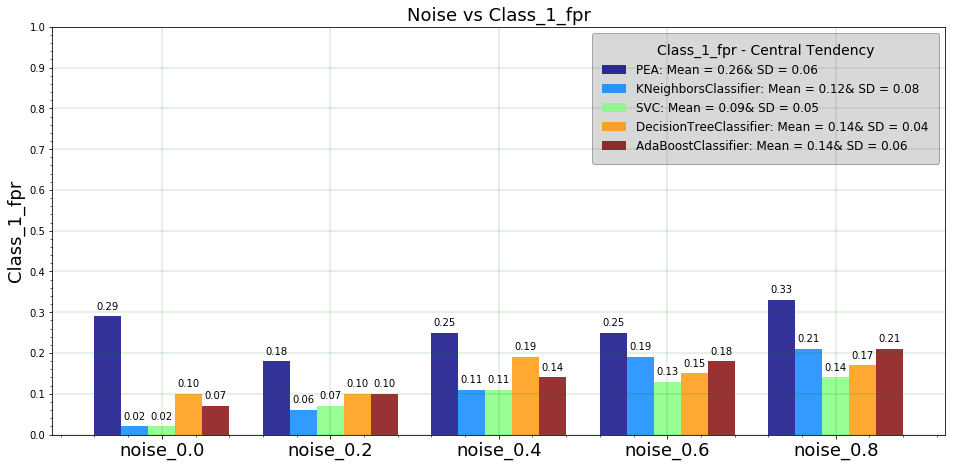

In [369]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
#ax.set_ylim(0,2)
ax.set_ylabel('Class_1_fpr',fontsize=18)
ax.set_title('Noise vs Class_1_fpr',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_1_fpr - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.45,0.02,0.01,0.08,0.10
noise_0.2,0.35,0.07,0.03,0.10,0.10
noise_0.4,0.45,0.16,0.08,0.14,0.18
noise_0.6,0.33,0.30,0.09,0.20,0.27
noise_0.8,0.60,0.41,0.16,0.28,0.40


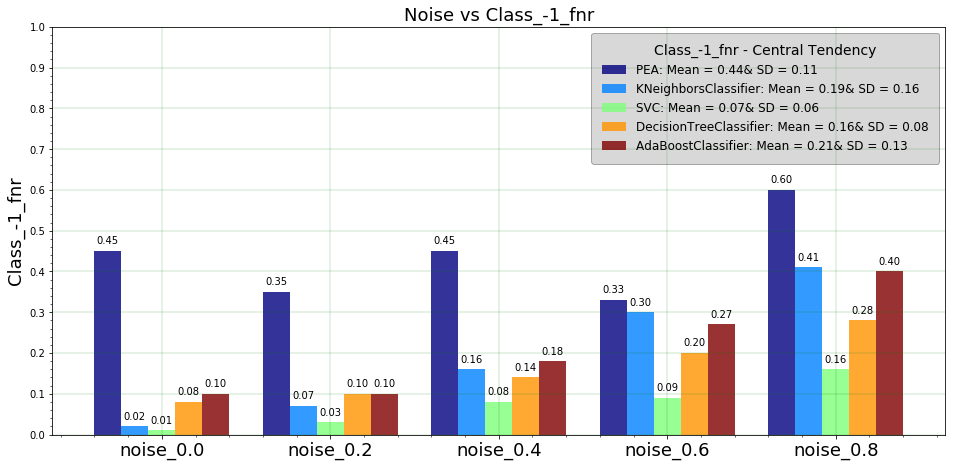

In [374]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
#ax.set_ylim(0,2)
ax.set_ylabel('Class_-1_fnr',fontsize=18)
ax.set_title('Noise vs Class_-1_fnr',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_-1_fnr - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.54,0.37,0.34,0.62,0.50
noise_0.2,0.59,0.64,0.46,0.78,0.68
noise_0.4,0.79,0.77,0.82,0.85,0.81
noise_0.6,0.86,0.77,0.91,0.88,0.83
noise_0.8,0.71,0.78,1.00,0.72,0.80


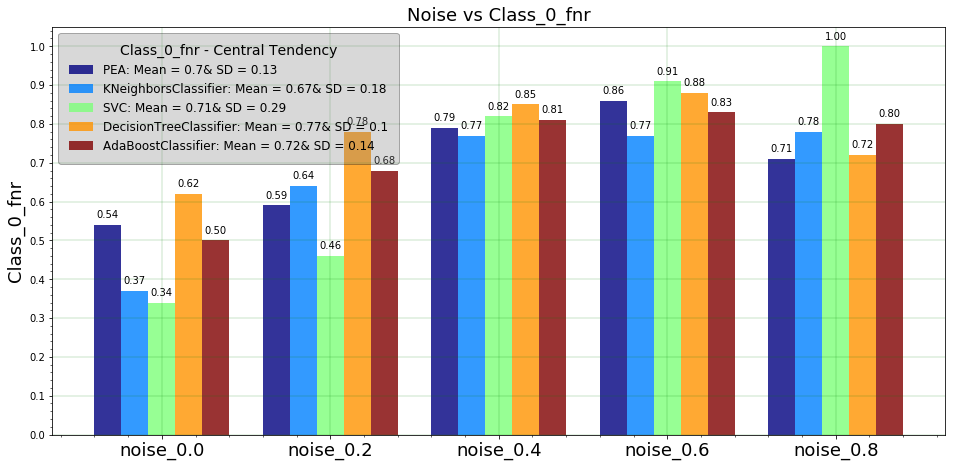

In [377]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
#ax.set_ylim(0,2)
ax.set_ylabel('Class_0_fnr',fontsize=18)
ax.set_title('Noise vs Class_0_fnr',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_0_fnr - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.51,0.18,0.09,0.41,0.28
noise_0.2,0.44,0.40,0.43,0.48,0.34
noise_0.4,0.58,0.51,0.50,0.60,0.48
noise_0.6,0.64,0.68,0.65,0.64,0.63
noise_0.8,0.73,0.75,0.66,0.61,0.66


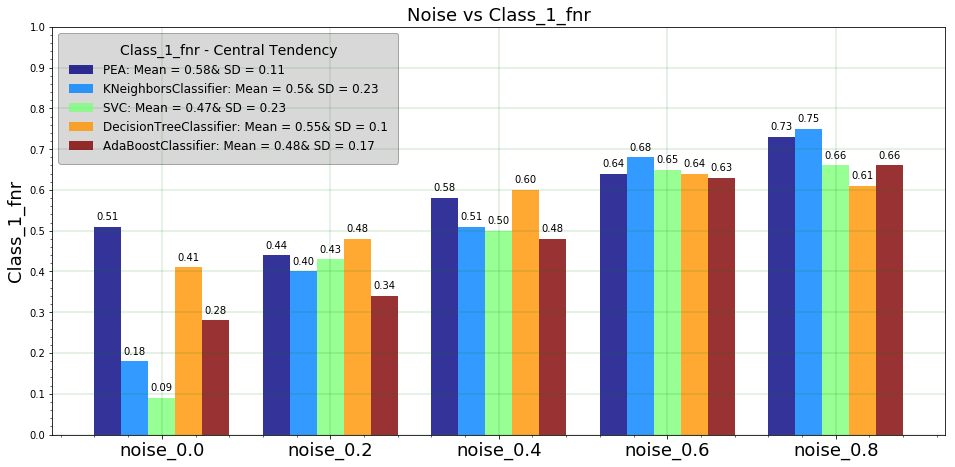

In [380]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
#ax.set_ylim(0,2)
ax.set_ylabel('Class_1_fnr',fontsize=18)
ax.set_title('Noise vs Class_1_fnr',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_1_fnr - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

In [388]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


0.5313979392926761


In [500]:

def noise(clf):
    
    list_of_auc = []
    list_values = list(np.round(np.arange(0, 1, 0.2),2))
    
    for noise in list_values:
        list_temp = []
        list_temp_A = []
        list_temp_B = []
        list_temp_C = []
        X, y = helper_data_generator.make_classification(n_samples=5000,
                                       n_features=26,
                                       n_informative=21,
                                       n_redundant=5,
                                       n_repeated=0,
                                       n_classes=3,
                                       n_clusters_per_class=1,
                                       class_sep=0.9,
                                       flip_y=noise,
                                       weights=[0.65,0.11,0.24])

        column_size = X.shape[1]
        cols = [x + str(i) for x, i in zip(["col"]*column_size,
                                               range(column_size))]

        y = pd.DataFrame(y, columns=['label'])
        y.index = np.arange(0, len(y))
        y.index.name = 'index'

        syn_df = pd.DataFrame(X, columns=cols)
        syn_df.index = np.arange(0, len(syn_df))
        syn_df.index.name = 'index'
        syn_df = syn_df.merge(y, on='index')
        #display(syn_df)


        rkf = KFold(n_splits=2)
        for train, test in rkf.split(syn_df):
            syn_df_train = syn_df.loc[train]
            syn_df_test = syn_df.loc[test]
            X_train = syn_df_train.loc[:, cols].reset_index(drop=True)
            y_train = syn_df_train.loc[:, 'label'].reset_index(drop=True)
            X_test = syn_df_test.loc[:, cols].reset_index(drop=True)
            y_test = syn_df_test.loc[:, 'label'].reset_index(drop=True)
            X_train, y_train = shuffle(X_train, y_train)
            clf.fit(X_train, y_train)
            prediction = clf.predict(X_test)
            y_test = label_binarize(y_test, classes=[0,1,2])
            prediction = label_binarize(prediction, classes=[0,1,2])
            fpr = dict()
            tpr = dict()
            roc_auc = dict()
            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve(y_test[:, i], prediction[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])
            #print('roc_auc_class: ',roc_auc)
            
            list_temp_A.append(roc_auc[0])
            list_temp_B.append(roc_auc[1])
            list_temp_C.append(roc_auc[2])
            
            #print('class_0: ',roc_auc[0])
        
        #print('noise', noise)
        #print('class_0_mean: ',np.mean(list_temp_A))
        #print('class_1_mean: ',np.mean(list_temp_B))
        #print('class_2_mean: ',np.mean(list_temp_C))
        list_of_auc.append((np.mean(list_temp_A),np.mean(list_temp_B),np.mean(list_temp_C)))
        #print(list_of_auc)
        
    return list(np.round(list_of_auc,2)[:,2]) # class A or -1

In [501]:
list_lists_clf = []
list_lists_clf_accuracies = []

for i in range(len(classifier_list)):
    list_lists_clf.append('list'+str(i))

for i in range(len(list_lists_clf)):
    list_lists_clf[i] = []
    
for i in range(len(classifier_list)):
    if isinstance(classifier_list[i],PerformanceEnrichmentAnalysisClassifier):
        name = 'PEA'
        list_lists_clf_accuracies.append((name,noise(classifier_list[i])))
    else:
        list_lists_clf_accuracies.append((str(classifier_list[i]).split('(')[0],noise(classifier_list[i])))

#print(list_lists_clf_accuracies)

dict_items= {}
    
for i in range(np.array(list_lists_clf_accuracies).shape[0]):
    #print(i)
    dict_items[np.unique(np.array(list_lists_clf_accuracies).T[0][i])[0]] = np.hstack((np.array(list_lists_clf_accuracies).T[1][i]))
    
print(dict_items)

list_lists_clf = []

for i in range(5):
    list_lists_clf.append('list'+str(i))

for i in range(5):
    list_lists_clf[i] = []

for i in range(5):
    for key, value in dict_items.items():
        #print(key, value)
        list_lists_clf[i].append((key,value[i]))
    #print(len(value))
    #print(np.array(dict_items['SVC'].T).reshape(-1,1))
    
#print(list_lists_clf)

list_lists_clf = np.array(list_lists_clf)
a = list_lists_clf.T[0].reshape(1,-1)
a = a[0]

_, idx = np.unique(a, return_index=True)
x = a[np.sort(idx)]

list_noise_vals = list(np.round(np.arange(0, 1, 0.2),2))
list_noise_vals = np.array(list_noise_vals)

y = list_lists_clf.T[1]

col_noise = []
for i in list_noise_vals:
    col_noise.append(('noise_'+str(i)))

{'PEA': array([0.77, 0.63, 0.62, 0.55, 0.52]), 'KNeighborsClassifier': array([0.92, 0.81, 0.65, 0.57, 0.53]), 'SVC': array([0.92, 0.82, 0.74, 0.64, 0.57]), 'DecisionTreeClassifier': array([0.78, 0.68, 0.63, 0.58, 0.52]), 'AdaBoostClassifier': array([0.74, 0.73, 0.67, 0.59, 0.51])}


,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.66,0.87,0.88,0.78,0.85
noise_0.2,0.64,0.79,0.82,0.72,0.74
noise_0.4,0.61,0.67,0.66,0.64,0.65
noise_0.6,0.56,0.58,0.62,0.57,0.61
noise_0.8,0.54,0.52,0.54,0.51,0.55


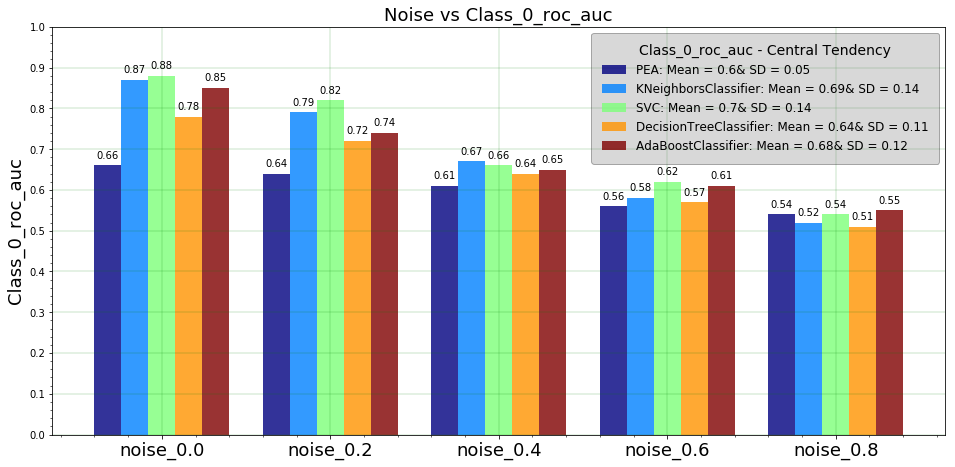

In [496]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
#ax.set_ylim(0,2)
ax.set_ylabel('Class_0_roc_auc',fontsize=18)
ax.set_title('Noise vs Class_0_roc_auc',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_0_roc_auc - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.71,0.82,0.87,0.63,0.80
noise_0.2,0.54,0.66,0.66,0.57,0.67
noise_0.4,0.58,0.57,0.59,0.55,0.55
noise_0.6,0.51,0.53,0.51,0.52,0.54
noise_0.8,0.51,0.52,0.50,0.50,0.52


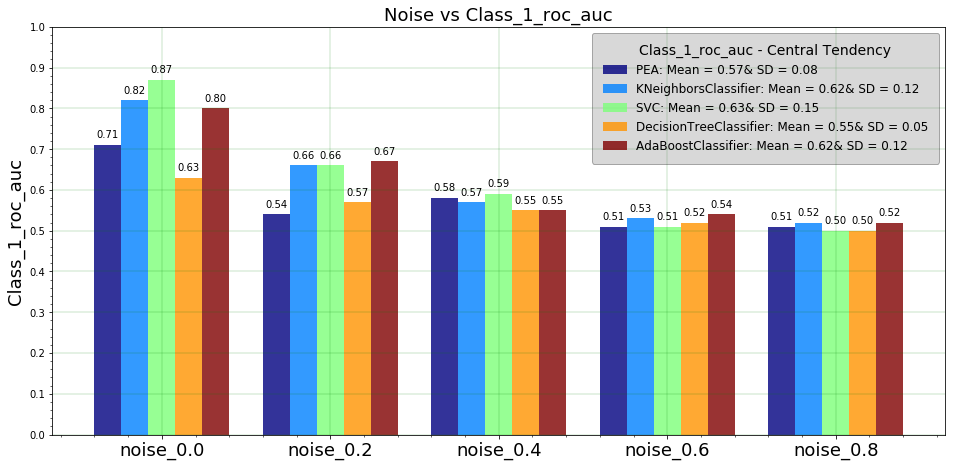

In [499]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
#ax.set_ylim(0,2)
ax.set_ylabel('Class_1_roc_auc',fontsize=18)
ax.set_title('Noise vs Class_1_roc_auc',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_1_roc_auc - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)

,PEA,KNeighborsClassifier,SVC,DecisionTreeClassifier,AdaBoostClassifier
noise_0.0,0.77,0.92,0.92,0.78,0.74
noise_0.2,0.63,0.81,0.82,0.68,0.73
noise_0.4,0.62,0.65,0.74,0.63,0.67
noise_0.6,0.55,0.57,0.64,0.58,0.59
noise_0.8,0.52,0.53,0.57,0.52,0.51


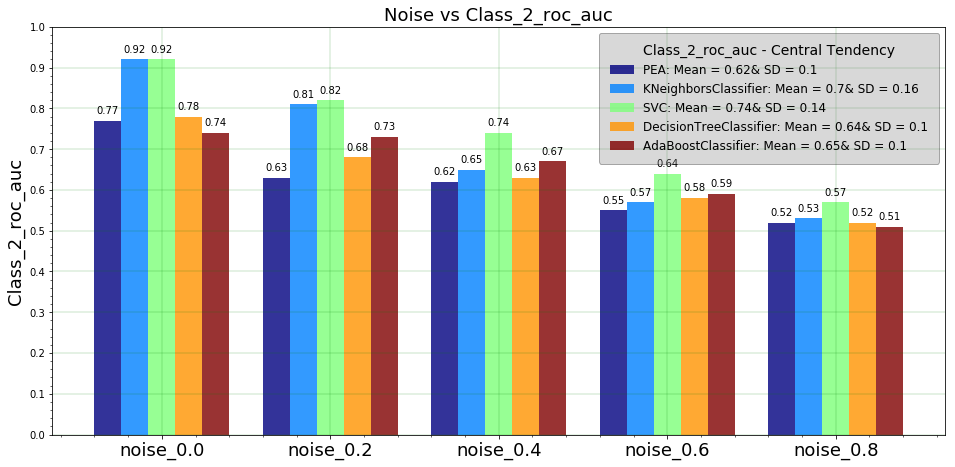

In [502]:
# https://stackoverflow.com/questions/43416629/removing-labels-from-pie-chart-moves-the-legend-box

df_1 = pd.DataFrame(y.T, index=col_noise, columns=x, dtype='float')
display(df_1)
ax = df_1.plot(kind='bar',figsize=(16, 7.5),width=0.8, cmap='jet', alpha=0.8)
ax.set_yticks(np.arange(0,1.1,0.1))
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.3', color='green', alpha=0.7)
#ax.grid(which='minor', linestyle=':', linsewidth='0.5', color='black')
ax.set_xticklabels(df_1.index,fontsize=18,rotation=0)
ax.set_facecolor('white')
#ax.set_ylim(0,2)
ax.set_ylabel('Class_2_roc_auc',fontsize=18)
ax.set_title('Noise vs Class_2_roc_auc',fontsize=18)

# facecolor='grey',
ax.legend(['PEA: Mean = '+ str(round(df_1.mean(),2)[0]) +'& SD = '+str(round(df_1.std(),2)[0]),
           'KNeighborsClassifier: Mean = '+ str(round(df_1.mean(),2)[1]) +'& SD = '+str(round(df_1.std(),2)[1]),
           'SVC: Mean = '+ str(round(df_1.mean(),2)[2]) +'& SD = '+str(round(df_1.std(),2)[2]),
           'DecisionTreeClassifier: Mean = '+ str(round(df_1.mean(),2)[3]) +'& SD = '+str(round(df_1.std(),2)[3]),
           'AdaBoostClassifier: Mean = '+ str(round(df_1.mean(),2)[4]) +'& SD = '+str(round(df_1.std(),2)[4])],
           fontsize=12, framealpha=0.3, facecolor='grey', edgecolor='black', title='Class_2_roc_auc - Central Tendency', title_fontsize=14, borderpad=.9)

# legend = ax.legend()
# frame = legend.get_frame()
# frame.set_color('grey')

labels = list(round(df_1.std(),2))

def add_value_labels(ax, spacing=5):
    
    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=10)                      # Vertically align label differently for
                                        # positive and negative values.

add_value_labels(ax)